### import data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('LSE_DA301_Week_2_files/Data/breast_cancer_data.csv')
print(df.head())
df.info()

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

### drop unneeded columns

In [2]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)

In [3]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### check target is balanced

In [4]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Create random forest

In [5]:

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 

# define X and y vars 
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)
forest = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=2,\
                             min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=1, random_state=42)
forest.fit(X_train, y_train)
y_pred=forest.predict(X_test)

In [23]:
y_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B'], dtype=object)

### check the accuracy 

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
confusion_matrix(y_test, y_pred)

array([[104,   4],
       [  3,  60]], dtype=int64)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.96      0.97       108
           M       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### random forest - print one of the trees

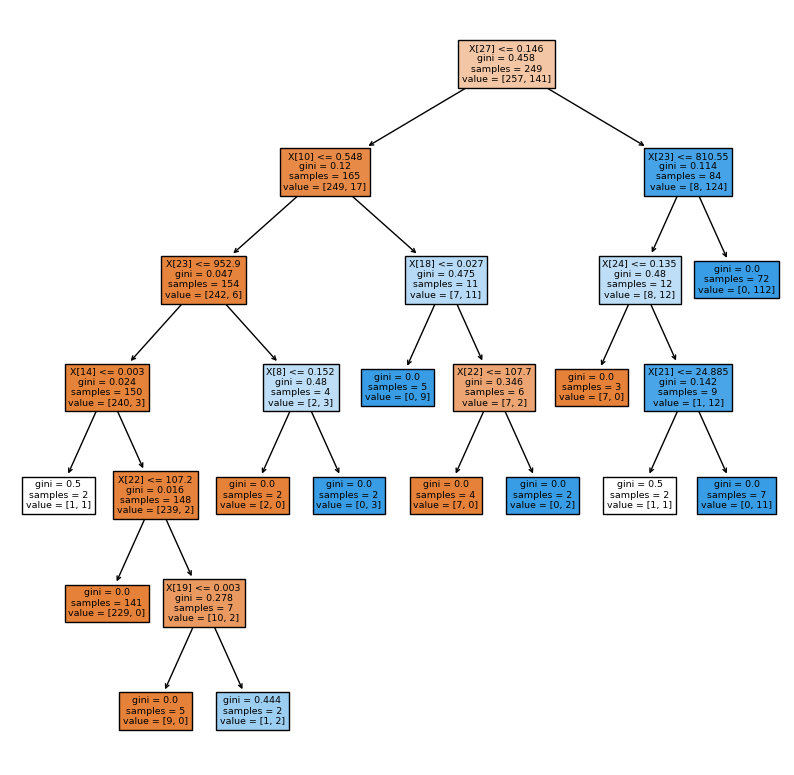

In [33]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=100)
tree.plot_tree(forest.estimators_[0], filled=True);
fig.savefig('random_forest_individual_tree.png')

In [34]:
forest.estimators_

[DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=2,
                        random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=2,
                        random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=2,
                        random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=2,
                        random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=2,
                        random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=2,
                        random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=2,
                        random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=2,
                        random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=2,
                   